<a href="https://colab.research.google.com/github/DeepShah1406/autism-ml-case-study/blob/main/Autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive from accessing dataset
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#Importing Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier #XGBoost, or eXtreme Gradient Boosting
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import warnings
import pydot

warnings.filterwarnings('ignore')

In [ ]:
# Loading train.csv file
df = pd.read_csv("/gdrive/MyDrive/23MSIT059/Sem-2/MS224 APP Python/Case Study/train.csv")

# Displaying the first 20 rows of the DataFrame
print(df.head(20))

    ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0    1         1         0         1         0         1         0         1   
1    2         0         0         0         0         0         0         0   
2    3         1         1         1         1         1         1         1   
3    4         0         0         0         0         0         0         0   
4    5         0         0         0         0         0         0         0   
5    6         1         0         0         0         0         1         0   
6    7         1         0         0         0         0         0         1   
7    8         1         1         1         1         1         1         1   
8    9         1         1         1         1         0         0         0   
9   10         0         0         0         0         0         0         0   
10  11         1         1         1         1         1         1         1   
11  12         1         1         0    

In [ ]:
print(df.shape)  # Printing size of the dataset.
print(df.info())   # Printing which type of data each and every column contains.

(800, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_a

In [ ]:
# Printing Descriptive statistical measures of the dataset (count, mean, std, min, etc.),
# for numerical columns in the dataset and transposes the result for better readability.
desstat = df.describe().T
print(desstat)

           count        mean         std       min         25%         50%  \
ID         800.0  400.500000  231.084400  1.000000  200.750000  400.500000   
A1_Score   800.0    0.560000    0.496697  0.000000    0.000000    1.000000   
A2_Score   800.0    0.530000    0.499411  0.000000    0.000000    1.000000   
A3_Score   800.0    0.450000    0.497805  0.000000    0.000000    0.000000   
A4_Score   800.0    0.415000    0.493030  0.000000    0.000000    0.000000   
A5_Score   800.0    0.395000    0.489157  0.000000    0.000000    0.000000   
A6_Score   800.0    0.303750    0.460164  0.000000    0.000000    0.000000   
A7_Score   800.0    0.397500    0.489687  0.000000    0.000000    0.000000   
A8_Score   800.0    0.508750    0.500236  0.000000    0.000000    1.000000   
A9_Score   800.0    0.495000    0.500288  0.000000    0.000000    0.000000   
A10_Score  800.0    0.617500    0.486302  0.000000    0.000000    1.000000   
age        800.0   28.452118   16.310966  2.718550   17.198153  

In [ ]:
# Preprocessing, Cleaning the Data
cln1 = df['ethnicity'].value_counts()
cln2 = df['relation'].value_counts()
print(cln1, cln2)

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64 relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64


In [ ]:
# Cleaning data by replacing yes to 1 and no to 0 & ('Others','others') to 'Others'
bol = df.replace({'yes': 1, 'no': 0, '?': 'Others', 'others': 'Others'})
print(bol)

      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0         0   

     A7_Score  A8_Score  A9_Score  ...  gender       ethnicity jaundice  \
0           1         0         1  ...       f          Othe

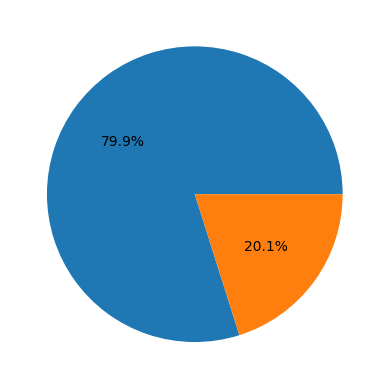

In [ ]:
# Using pandas, matplotlib
# Use of EDA and checking data imbalance "imblearn" and skewness of data.
# Exploratory Data Analysis (EDA) - Pie chart to check data imbalance.
plt.pie(bol['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

In [ ]:
# Categorizing the columns based on their data types.
ints = []       # integer data types
objects = []    # object data types
floats = []     # float data types

for col in df.columns:
    if df[col].dtype == int:
        ints.append(col)
    elif df[col].dtype == object:
        objects.append(col)
    else:
        floats.append(col)

In [ ]:
# Removing 'ID' and 'Class/ASD' from the integer columns list.

ints.remove('ID')
ints.remove('Class/ASD')

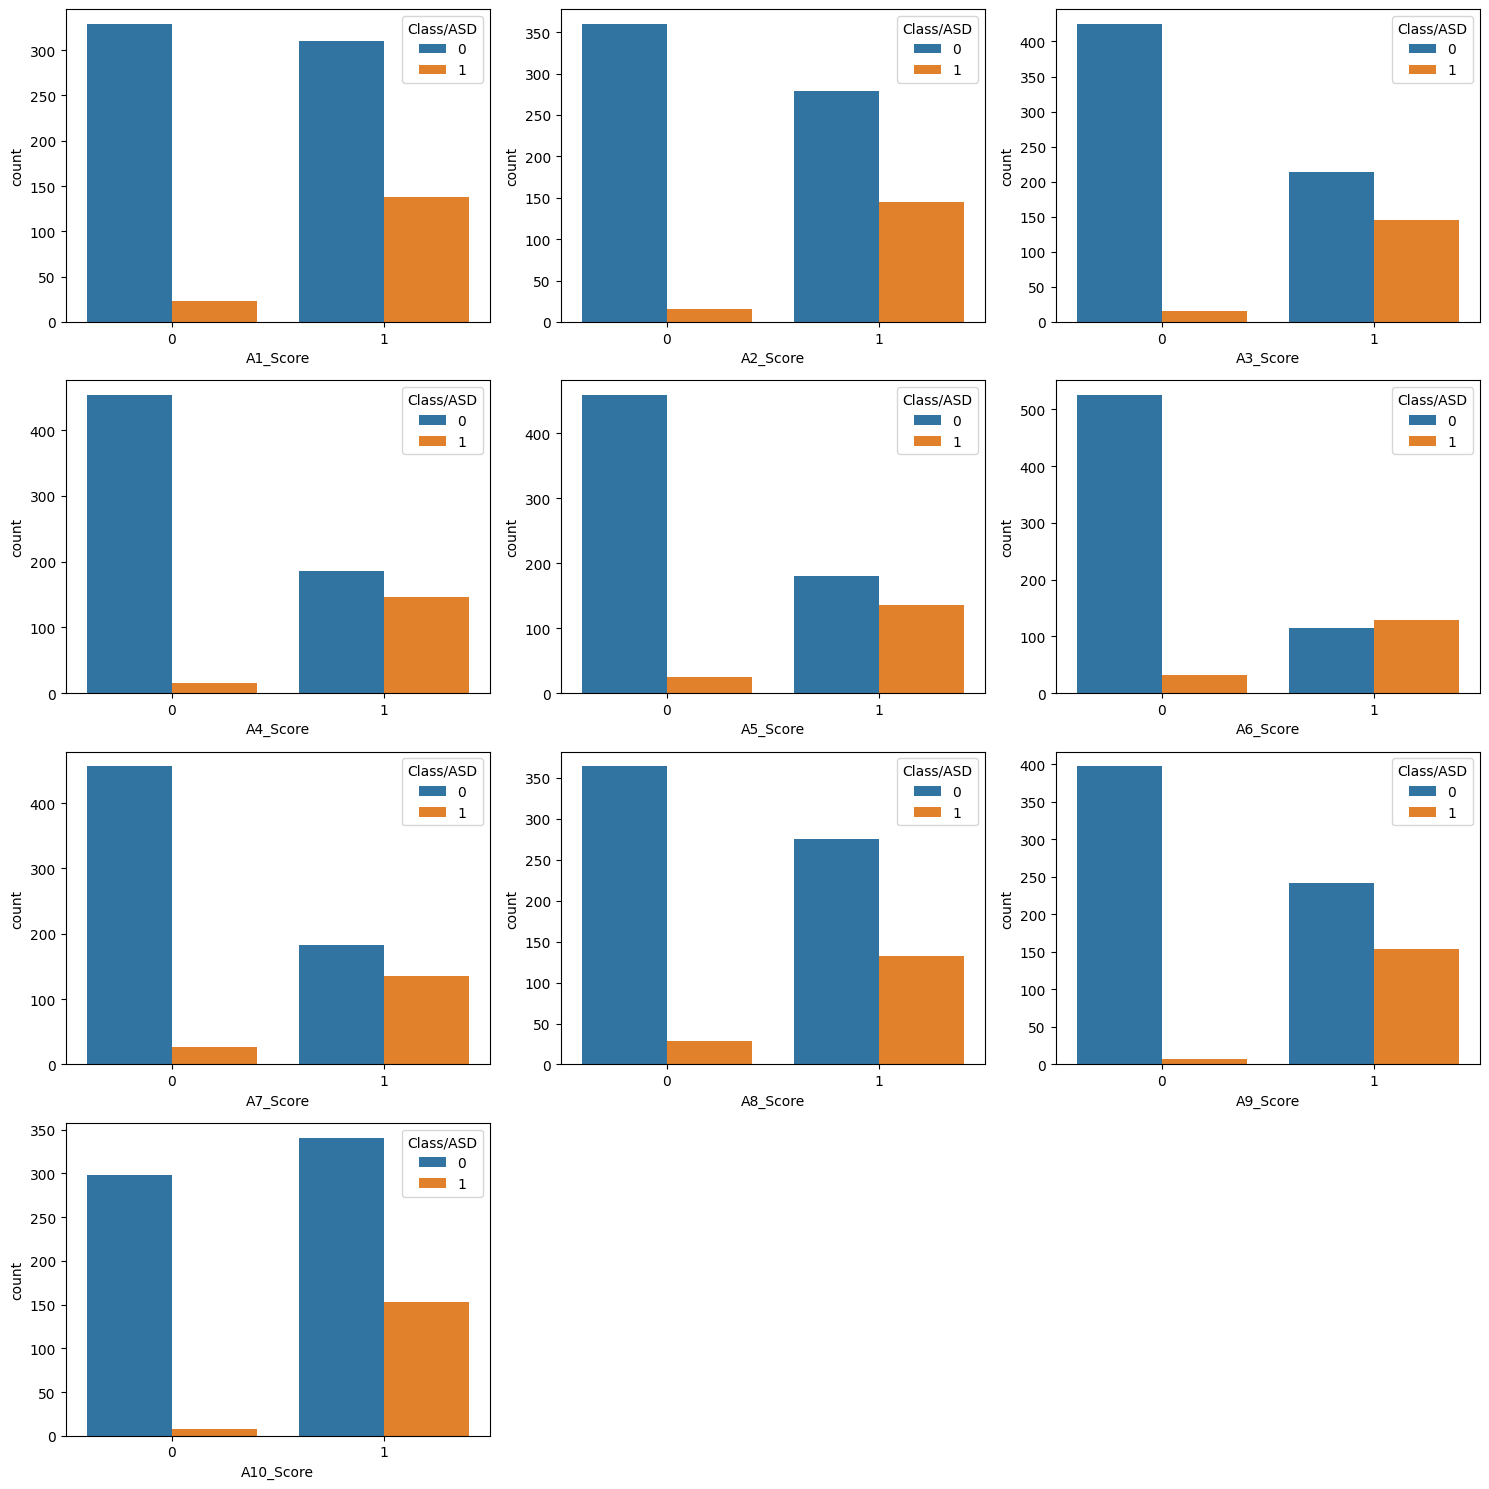

In [ ]:
# Use of Seaborn Library.
# Plotting count plots for each integer column, differentiating based on 'Class/ASD' column using Seaboen Library.
plt.subplots(figsize=(15, 15))

for i, col in enumerate(ints):
    plt.subplot(4, 3, i+1)
    #hue refers to a variable that is used to introduce color coding to a plot or chart.
    #it just assigns different colors to categorical variables
    sb.countplot(data=bol, x=col, hue='Class/ASD')

plt.tight_layout()
plt.show()

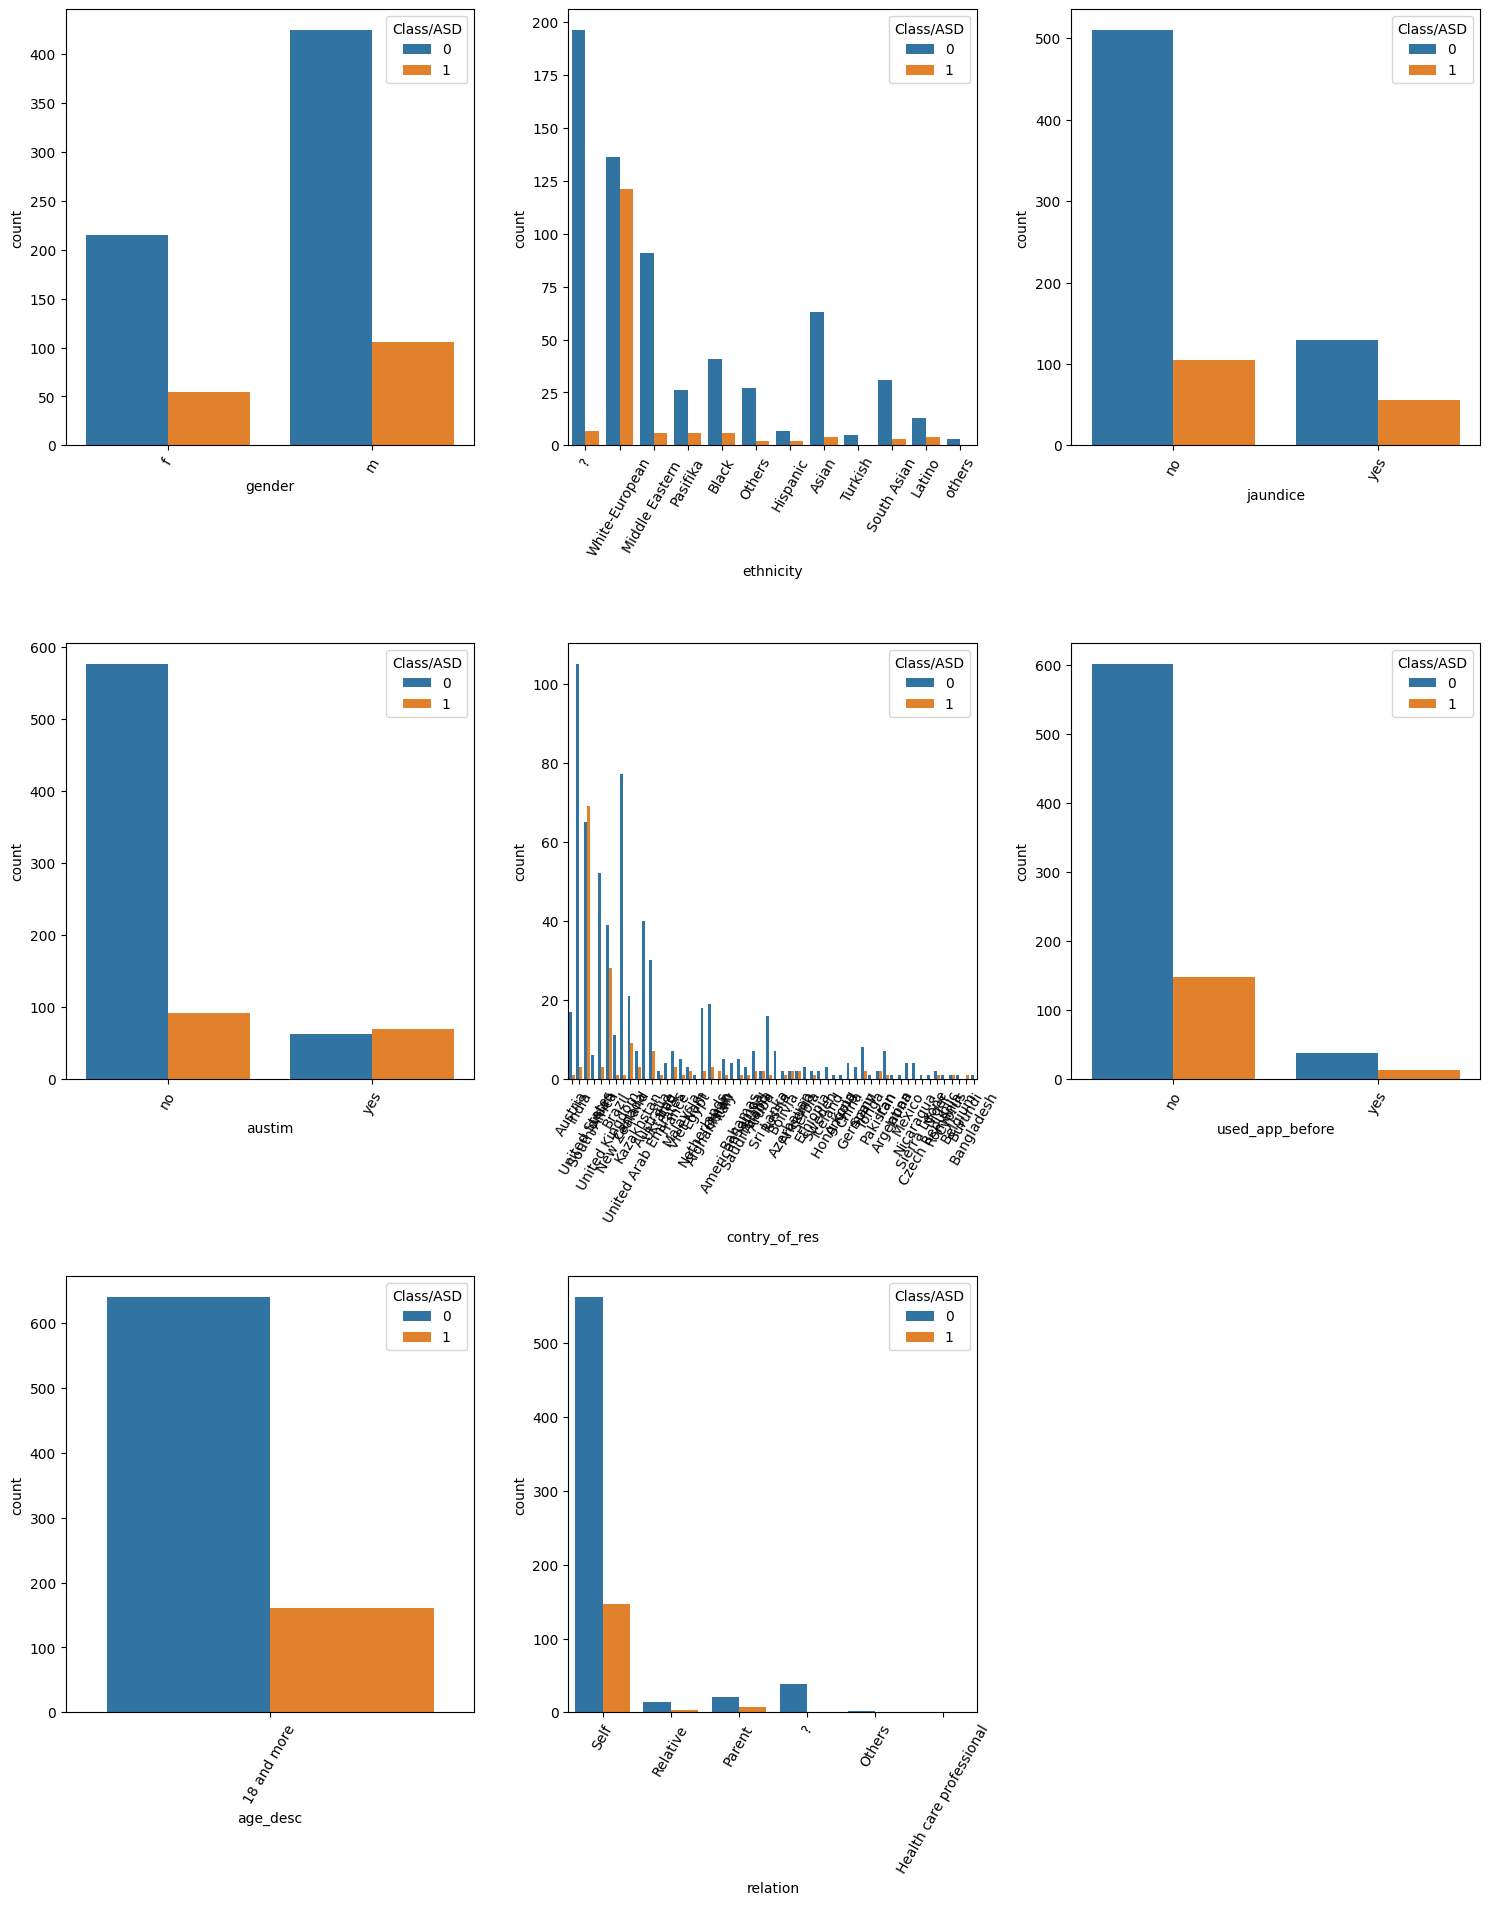

In [ ]:
# Use of Seaborn Library.
# Plotting count plots for each object column, differentiating based on 'Class/ASD' column.

plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    sb.countplot(data=df, x=col, hue=df['Class/ASD'].astype('category'))
    plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

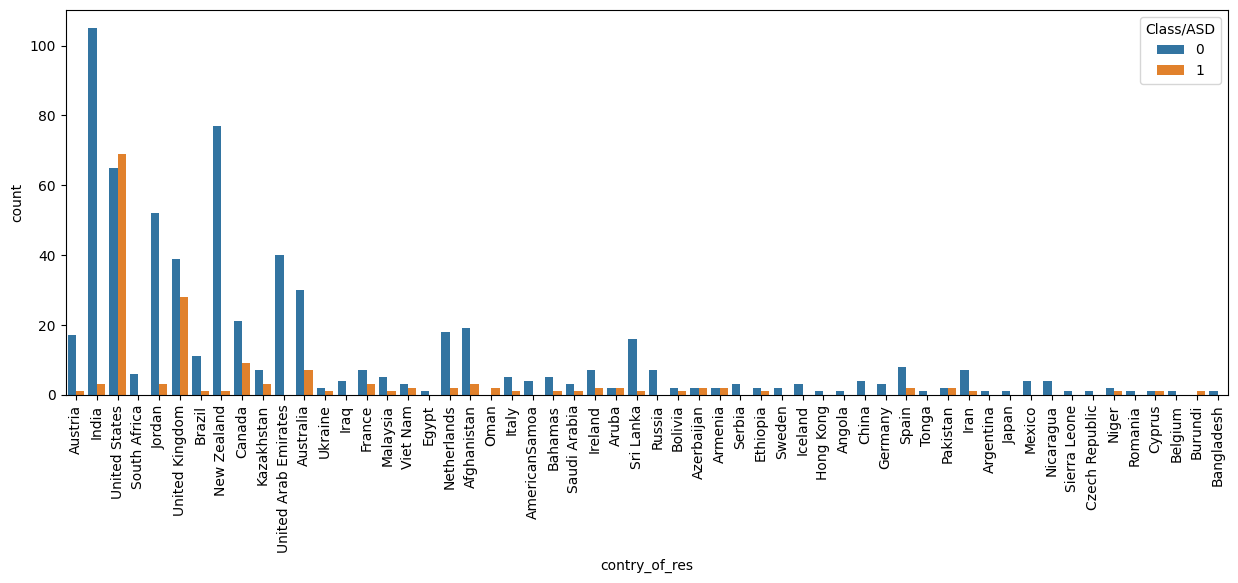

In [ ]:
# Similarly Use of Seaborn Lib.
# Plotting count plot for 'country_of_res' column.

plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

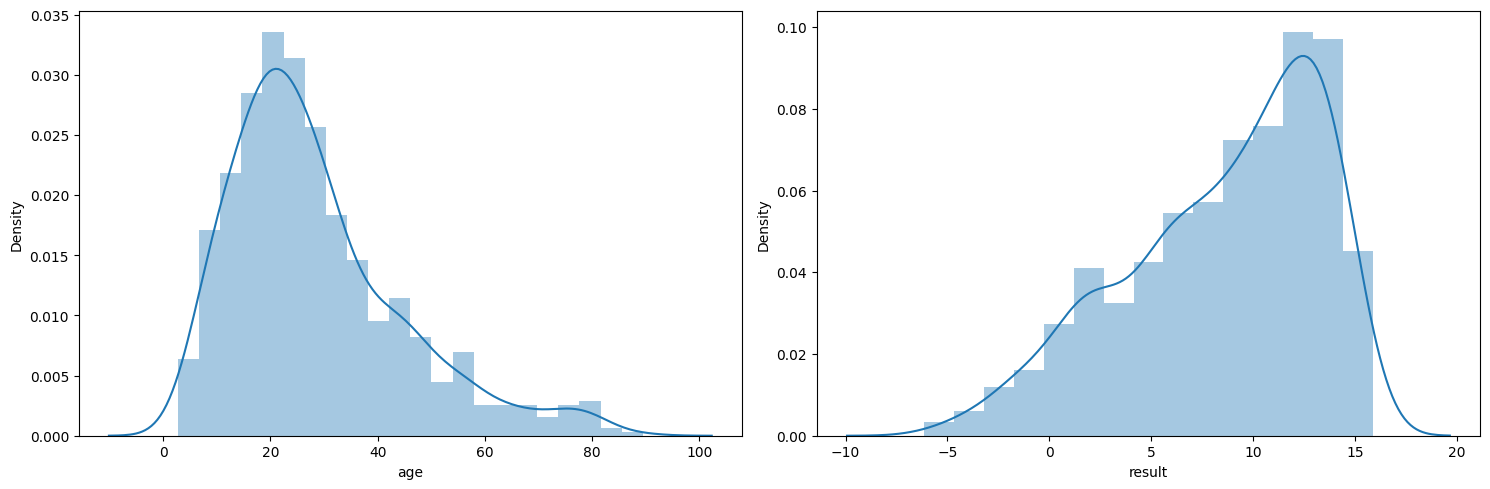

In [ ]:
# Plotting distribution plots for each float column

plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

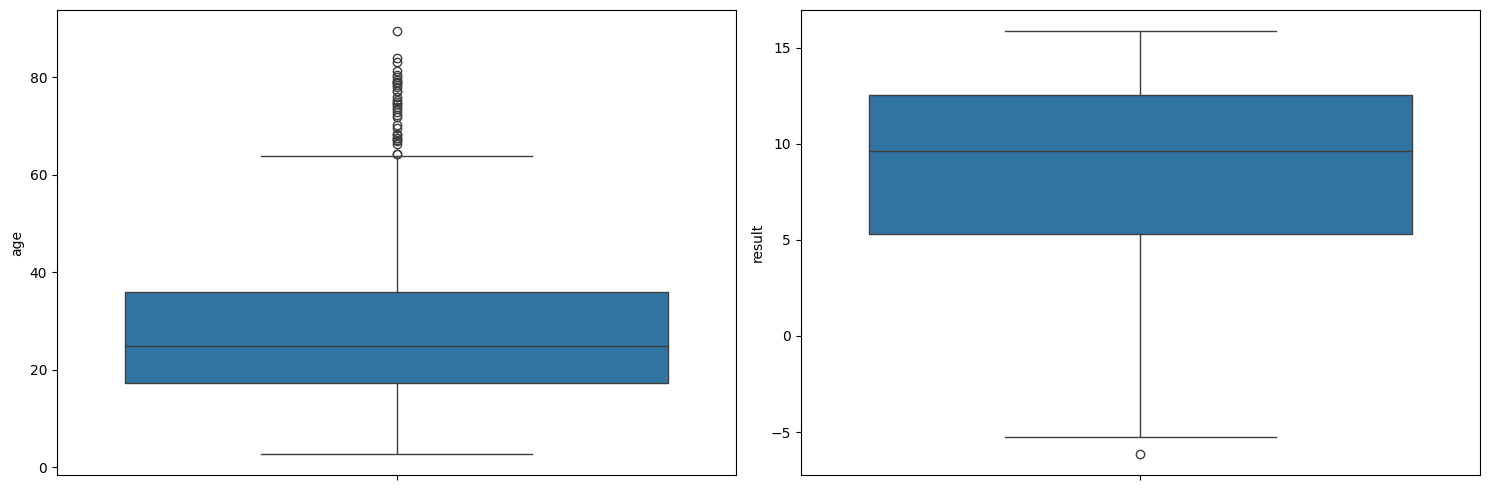

In [ ]:
# Plotting box plots for each float column

plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
# Removing rows with 'result' less than -5

df = df[df['result']>-5]
df.shape

(798, 22)

In [ ]:
# This functions make groups by taking the age as a parameter
# Creating a new column 'ageGroup' based on age

def convertAge(age):
  if age < 4:
    return 'Toddler'
  elif age < 12:
    return 'Kid'
  elif age < 18:
    return 'Teenager'
  elif age < 40:
    return 'Young'
  else:
    return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

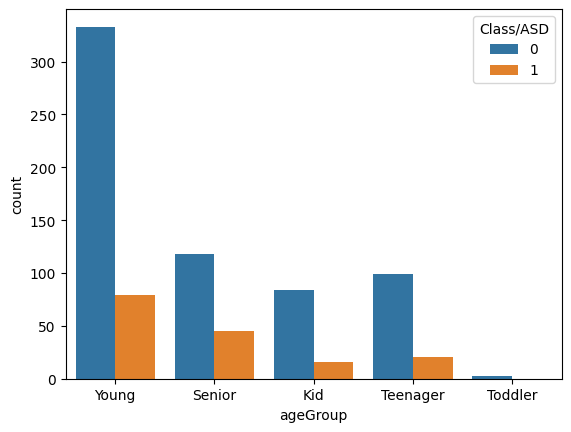

In [ ]:
# Plotting count plot for 'ageGroup' column

sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

In [ ]:
# Adding new features 'sum_score' and 'ind' to the DataFrame

def add_feature(data):

# Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

    # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

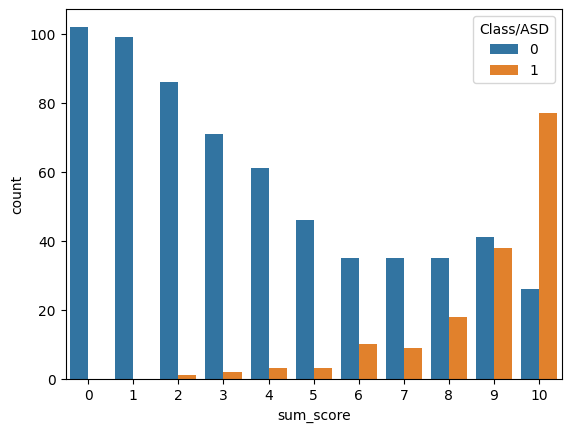

In [ ]:
# Plotting count plot for 'sum_score' column

sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [ ]:
# Applying log transformations to remove the skewness of the 'age' column.
df['age'] = df['age'].apply(lambda x: np.log(x))

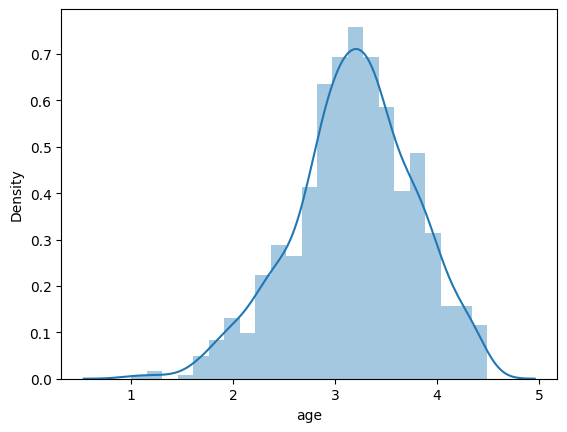

In [ ]:
# Plotting distribution plot for the transformed 'age' column

sb.distplot(df['age'])
plt.show()

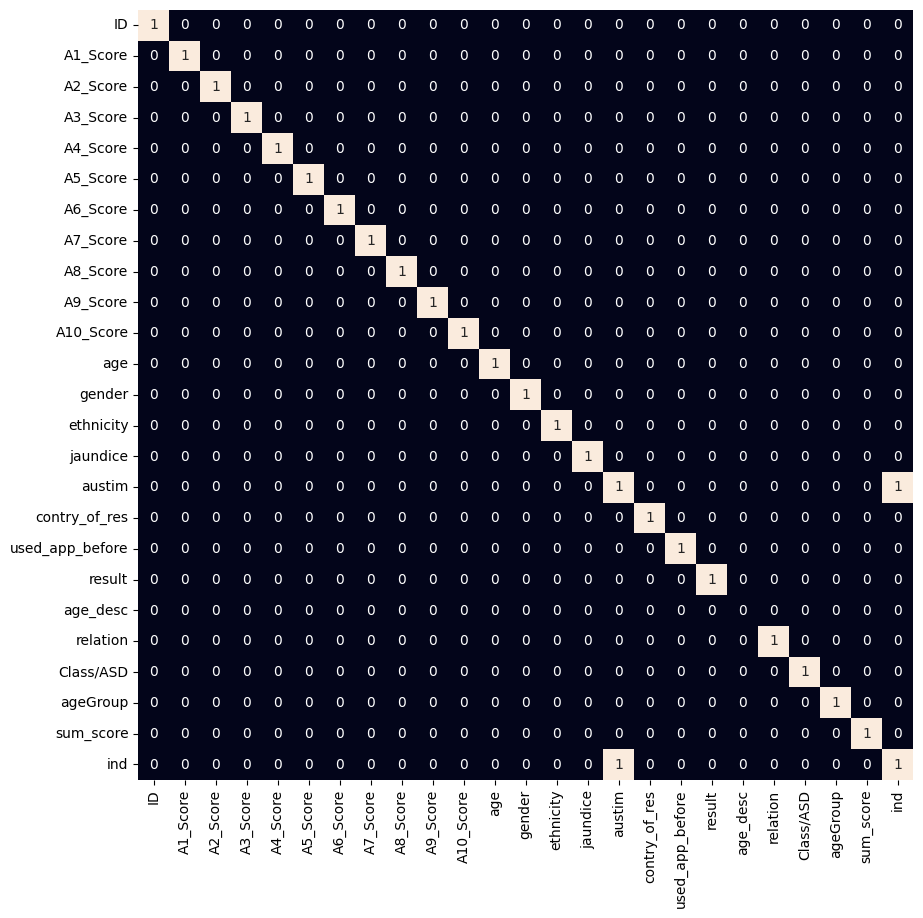

In [ ]:
# Encoding categorical labels using LabelEncoder

def encode_labels(data):
  for col in data.columns:

	# Here we will check if datatype
	# is object then we will encode it
    if data[col].dtype == 'object':
      le = LabelEncoder()
      data[col] = le.fit_transform(data[col])

  return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [ ]:
# Removing unnecessary columns from features

removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [ ]:
# Splitting the data into train and validation sets

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# Balancing the data by oversampling the minority class
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((1026, 20), (1026,))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [ ]:
# Training and evaluating models

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  0.8674463937621832
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6993727598566308

SVC() : 
Training Accuracy :  0.9376218323586746
Validation Accur

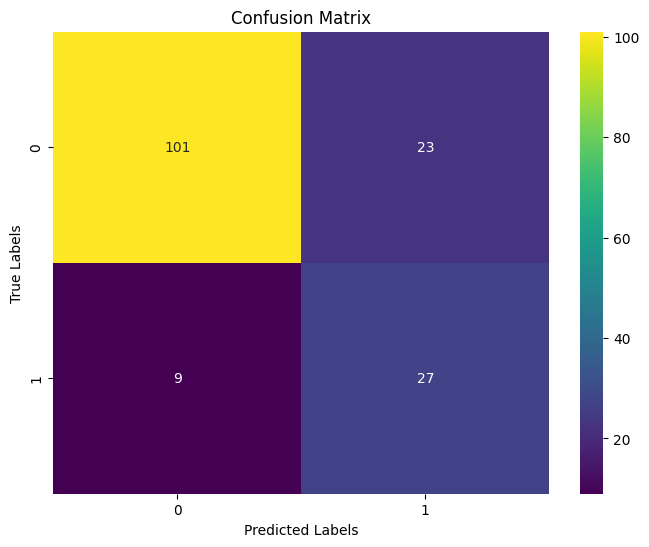

In [ ]:
# Predicting labels using the first model and plotting the confusion matrix

from sklearn.metrics import confusion_matrix

# Predicting the labels using the first model
y_pred = models[0].predict(X_val)

# Computing the confusion matrix
conf_mat = confusion_matrix(Y_val, y_pred)

# Plotting the confusion matrix as a heatmap with a colorful colormap
plt.figure(figsize=(8, 6))
sb.heatmap(conf_mat, annot=True, fmt='d', cmap='viridis')  # Use 'viridis' or any other colorful colormap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()